In [231]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


In [232]:
df = pd.read_csv("train.csv",usecols=['Survived','Age','Fare'])

In [233]:
df.columns

Index(['Survived', 'Age', 'Fare'], dtype='object')

In [234]:
df.sample(3)

,Survived,Age,Fare
79,1,30.0,12.4750
878,0,NaN,7.8958
56,1,21.0,10.5000


In [235]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [236]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\A\AppData\Local\Temp\ipykernel_13488\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [237]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [238]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [239]:
print(type(x))
x.count()

<class 'pandas.core.frame.DataFrame'>


Age     891
Fare    891
dtype: int64

In [240]:
print(type(y))
y.count()

<class 'pandas.core.series.Series'>


891

In [241]:
x_train ,x_test ,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [242]:
print(x_train.count())
print(type(x_train))

Age     623
Fare    623
dtype: int64
<class 'pandas.core.frame.DataFrame'>


C:\Users\A\AppData\Local\Temp\ipykernel_13488\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

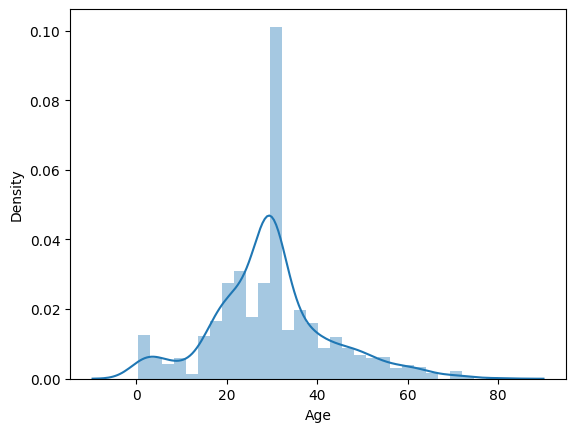

In [243]:
sns.distplot(df['Age'])

C:\Users\A\AppData\Local\Temp\ipykernel_13488\3425841524.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

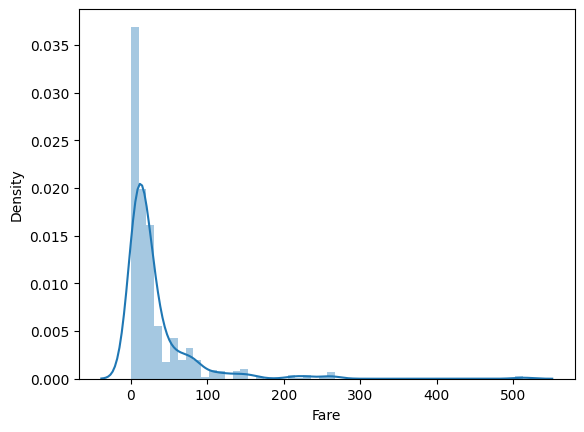

In [244]:
sns.distplot(df['Fare'])

In [245]:
clf = DecisionTreeClassifier()

In [246]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [247]:
y_pred = clf.predict(x_test)

In [248]:
accuracy_score(y_test,y_pred)

0.6791044776119403

In [249]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 445 to 102
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     623 non-null    float64
 1   Fare    623 non-null    float64
dtypes: float64(2)
memory usage: 14.6 KB


# With Discretization

In [259]:
kbin_age = KBinsDiscretizer(n_bins=10,strategy='uniform',encode='ordinal')
kbin_fare = KBinsDiscretizer(n_bins=10,strategy='uniform',encode='ordinal')

In [251]:
trf = ColumnTransformer([
    ('age_discretization',kbin_age,[0]),
    ("fare_discretization",kbin_fare,[1])
])

In [252]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

c:\Users\A\.conda\envs\ml_env\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\A\.conda\envs\ml_env\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [253]:
x_test_transformed

array([[3., 0.],
       [3., 0.],
       [2., 0.],
       [0., 1.],
       [1., 0.],
       [3., 4.],
       [3., 0.],
       [1., 1.],
       [1., 0.],
       [2., 1.],
       [4., 2.],
       [5., 0.],
       [3., 1.],
       [3., 0.],
       [4., 0.],
       [1., 2.],
       [5., 2.],
       [3., 0.],
       [3., 0.],
       [5., 2.],
       [2., 0.],
       [4., 1.],
       [2., 0.],
       [2., 0.],
       [3., 0.],
       [1., 1.],
       [4., 1.],
       [3., 0.],
       [0., 1.],
       [3., 0.],
       [2., 0.],
       [2., 0.],
       [3., 1.],
       [3., 0.],
       [2., 0.],
       [3., 0.],
       [3., 1.],
       [3., 0.],
       [3., 1.],
       [3., 0.],
       [2., 3.],
       [3., 0.],
       [3., 0.],
       [3., 0.],
       [5., 0.],
       [1., 1.],
       [2., 0.],
       [2., 0.],
       [2., 0.],
       [7., 5.],
       [0., 1.],
       [6., 4.],
       [4., 1.],
       [1., 5.],
       [8., 0.],
       [2., 4.],
       [3., 0.],
       [6., 8.],
       [4., 1.

C:\Users\A\AppData\Local\Temp\ipykernel_13488\872504959.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_test_transformed[:,0])


<Axes: ylabel='Density'>

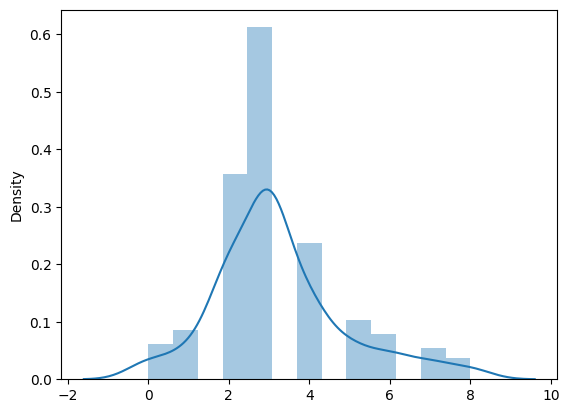

In [254]:
sns.distplot(x_test_transformed[:,0])

C:\Users\A\AppData\Local\Temp\ipykernel_13488\2682858041.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_test_transformed[:,1])


<Axes: ylabel='Density'>

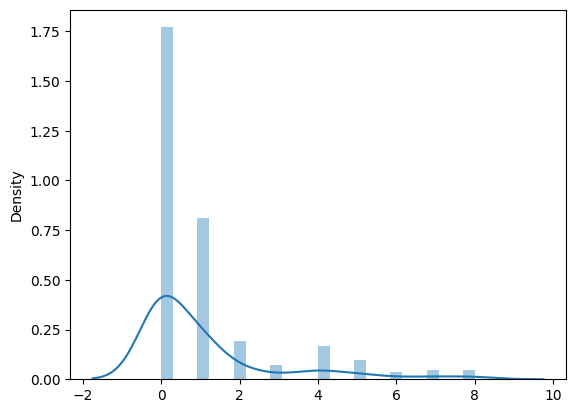

In [255]:
sns.distplot(x_test_transformed[:,1])

In [256]:
clf.fit(x_train_transformed,y_train)

DecisionTreeClassifier()

In [257]:
y_predict = clf.predict(x_test)

c:\Users\A\.conda\envs\ml_env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [258]:
accuracy_score(y_test,y_predict)

0.5111940298507462